# Стратегия взаимодействия с клиентами сети фитнес-центров «Культурист-датасаентист»

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
<br>Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
<br>Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
<br>Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
<br>Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

**Цель проекта:** провести анализ и подготовить план действий по удержанию клиентов.

**Задачи проекта:**
- прогнозирование вероятности оттока (на уровне следующего месяца) для каждого клиента;
- формирование типичных портретов клиентов;
- разработка выводов и рекомендаций по повышению качества работы с клиентами: в частности, определение _целевых групп клиентов_, мер по _снижению оттока_ и _особенностей взаимодействия с клиентами_.

## Подготовка и изучение исходных данных

### Подключение основных библиотек и настроек

In [1]:
# подключим обновления
!pip install plotly
!pip install matplotlib==3.4.3 --user --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import calendar
import seaborn as sb
import itertools

In [3]:
# импорт sklearn и ее методов/алгоритмов
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None 
sns.set(rc={'figure.figsize':(16,9)}) # настройка размера графиков
default='warn'
sb.set_style('whitegrid') # настройка стиля для seaborn
colors = sb.color_palette('bright')[0:5]  # настройка палитры для seaborn
pd.options.display.float_format = '{:,.3f}'.format # настройка округлений до 3 знаков после запятой

### Изучение данных из файла

In [5]:
try:
    fit = pd.read_csv('/datasets/gym_churn.csv')
except KeyError:
    print('Ошибка чтения')

In [6]:
fit.info()
fit.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0
5,1,1,0,0,1,1,1,34,450.744,1.000,3,2.623,2.637,0
6,1,1,1,1,0,6,1,32,94.266,6.000,2,1.139,1.277,0
7,0,1,0,0,1,1,0,30,217.787,1.000,0,1.214,1.049,1
8,1,1,1,1,1,1,1,23,45.410,1.000,1,1.106,1.059,0
9,0,1,0,0,1,1,0,31,65.311,1.000,11,1.811,1.951,0


In [7]:
#посмотрим на количество пропусков в каждом столбце таблицы
fit.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [8]:
#Проверим таблицу на явные дубликаты
fit.duplicated().sum()

0

### Просмотр статистических значений

In [9]:
fit.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.000",0.510,0.500,0.000,0.000,1.000,1.000,1.000
Near_Location,"4,000.000",0.845,0.362,0.000,1.000,1.000,1.000,1.000
Partner,"4,000.000",0.487,0.500,0.000,0.000,0.000,1.000,1.000
Promo_friends,"4,000.000",0.308,0.462,0.000,0.000,0.000,1.000,1.000
Phone,"4,000.000",0.903,0.295,0.000,1.000,1.000,1.000,1.000
Contract_period,"4,000.000",4.681,4.550,1.000,1.000,1.000,6.000,12.000
Group_visits,"4,000.000",0.412,0.492,0.000,0.000,0.000,1.000,1.000
Age,"4,000.000",29.184,3.258,18.000,27.000,29.000,31.000,41.000
Avg_additional_charges_total,"4,000.000",146.944,96.356,0.148,68.869,136.220,210.950,552.591
Month_to_end_contract,"4,000.000",4.323,4.191,1.000,1.000,1.000,6.000,12.000


### Корректировка названий столбцов

In [10]:
fit.columns = fit.columns.str.lower()
fit.head().T

,0,1,2,3,4
gender,1.000,0.000,0.000,0.000,1.000
near_location,1.000,1.000,1.000,1.000,1.000
partner,1.000,0.000,1.000,1.000,1.000
promo_friends,1.000,0.000,0.000,1.000,1.000
phone,0.000,1.000,1.000,1.000,1.000
contract_period,6.000,12.000,1.000,12.000,1.000
group_visits,1.000,1.000,0.000,1.000,0.000
age,29.000,31.000,28.000,33.000,26.000
avg_additional_charges_total,14.227,113.203,129.448,62.670,198.362
month_to_end_contract,5.000,12.000,1.000,12.000,1.000


### Преобразование форматов столбцов

Поле `month_to_end_contract` состоит только из целых значений от 1 до 12, изменим его тип на более подходящий `int8`

In [11]:
fit['month_to_end_contract'] = fit['month_to_end_contract'].astype('int8')

In [12]:
fit_int64 = fit.select_dtypes(include='int64')
print(fit_int64.T)

                 0     1     2     3     4     5     6     7     8     9     \
gender              1     0     0     0     1     1     1     0     1     0   
near_location       1     1     1     1     1     1     1     1     1     1   
partner             1     0     1     1     1     0     1     0     1     0   
promo_friends       1     0     0     1     1     0     1     0     1     0   
phone               0     1     1     1     1     1     0     1     1     1   
contract_period     6    12     1    12     1     1     6     1     1     1   
group_visits        1     1     0     1     0     1     1     0     1     0   
age                29    31    28    33    26    34    32    30    23    31   
lifetime            3     7     2     2     3     3     2     0     1    11   
churn               0     0     0     0     0     0     0     1     0     0   

                 ...  3990  3991  3992  3993  3994  3995  3996  3997  3998  \
gender           ...     1     1     0     0     1  

In [13]:
for row in fit_int64:
    fit[row] = fit[row].astype('int8')
fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int8   
 1   near_location                      4000 non-null   int8   
 2   partner                            4000 non-null   int8   
 3   promo_friends                      4000 non-null   int8   
 4   phone                              4000 non-null   int8   
 5   contract_period                    4000 non-null   int8   
 6   group_visits                       4000 non-null   int8   
 7   age                                4000 non-null   int8   
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int8   
 10  lifetime                           4000 non-null   int8   
 11  avg_class_frequency_total          4000 non-null   float

In [14]:
fit.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227,5,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1,3,1.114,1.120,0


### Классификация столбцов на числовые и категориальные

In [15]:
row_num = ['contract_period', 'age', 'avg_additional_charges_total', \
           'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
row_bin = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

### Проверка уникальных значений

In [21]:
for row in fit:
    print(row, )
    print(fit[row].value_counts(dropna=False).sort_index(ascending=True), '\n')

gender
0    1959
1    2041
Name: gender, dtype: int64 

near_location
0     619
1    3381
Name: near_location, dtype: int64 

partner
0    2053
1    1947
Name: partner, dtype: int64 

promo_friends
0    2766
1    1234
Name: promo_friends, dtype: int64 

phone
0     386
1    3614
Name: phone, dtype: int64 

contract_period
1     2207
6      833
12     960
Name: contract_period, dtype: int64 

group_visits
0    2351
1    1649
Name: group_visits, dtype: int64 

age
18      2
19      2
20     14
21     24
22     33
23     82
24    148
25    231
26    300
27    378
28    447
29    468
30    457
31    434
32    364
33    253
34    174
35     98
36     48
37     29
38     10
39      3
41      1
Name: age, dtype: int64 

avg_additional_charges_total
0.148      1
0.172      1
0.252      1
0.335      1
0.362      1
          ..
488.708    1
496.172    1
515.393    1
534.256    1
552.591    1
Name: avg_additional_charges_total, Length: 4000, dtype: int64 

month_to_end_contract
1     2207
2      

Построим графики уникальных значений для категориальных переменных

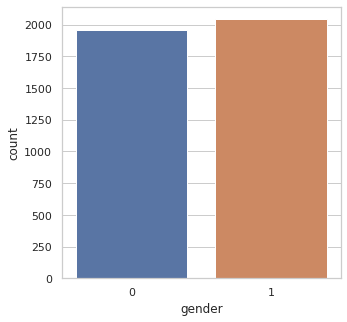

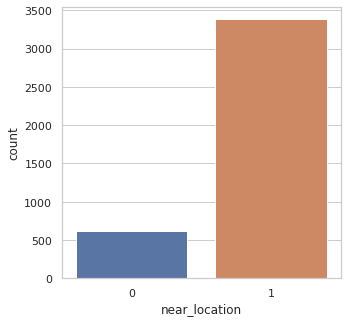

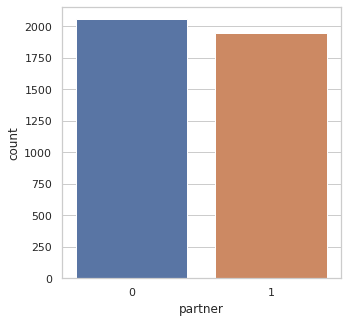

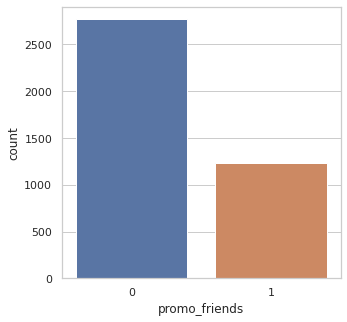

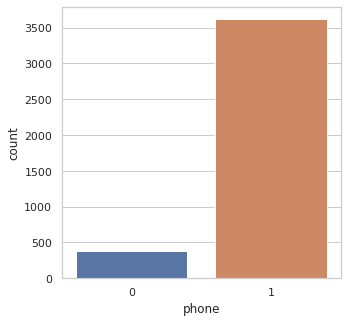

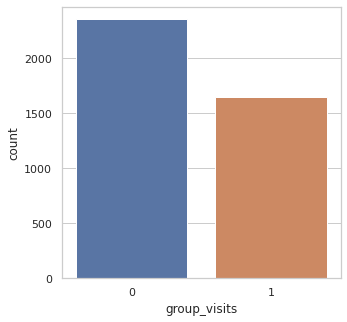

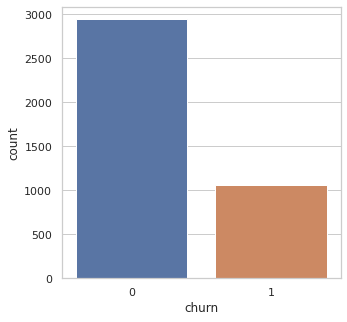

In [17]:
for column in row_bin:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = fit[column], data=fit)
    plt.show()

Добавим графики уникальных значений для остальных столбцов

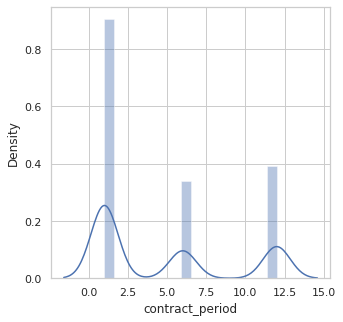

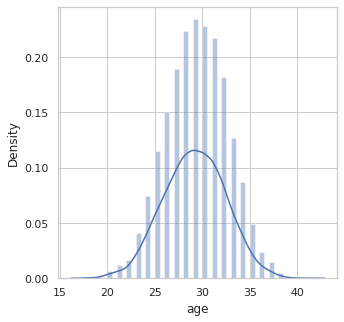

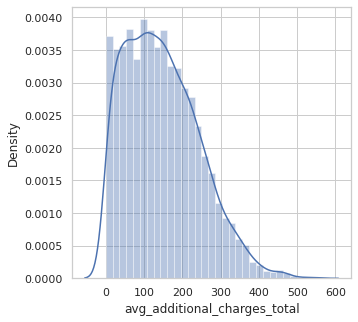

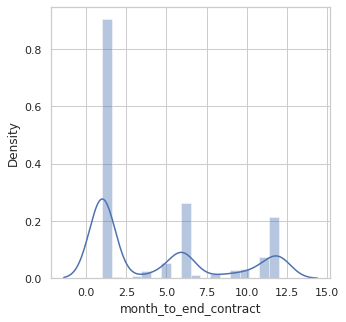

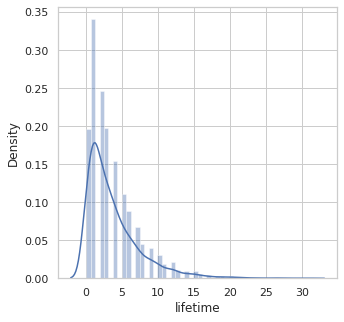

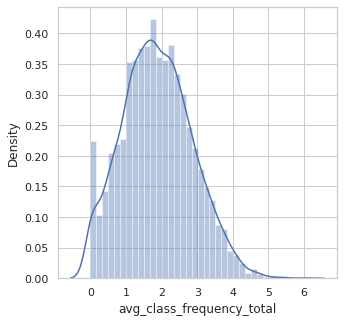

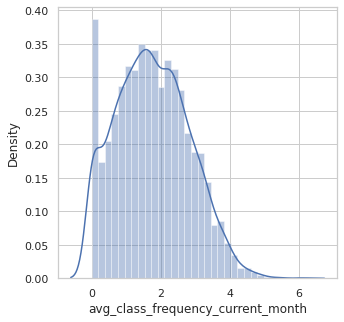

In [19]:
for column in row_num:
    plt.figure(figsize=(5, 5))
    sns.distplot(fit[column])
    plt.show()

### Выводы по пункту 1

При чтении файла с исходными данными была получена следующая информация.
<br>Файл состоит из **4000 строк** (индивидуальных клиентов),
<br>
<br>Набор данных включает **14 полей**:
<br>1) Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба;
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга»;
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
<br>
<br>2) Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра.
<br>
<br>3) `Churn` — факт оттока в текущем месяце.

Пропусков в таблице нет. Явных дубликатов тоже нет. Все уникальные значения соответствуют логике. 
<br> Тип данных столбца `Month_to_end_contract` не соответствует логике, переведем его в `int8`
<br> Понизим разрядность всех столбцов `int64` до `int8`

Датафрейм состоит из числовых и категориальных полей (категориальные, в нашем случае, для облегчения расчетов приведены к числовым, 0 и 1)
<br>Числовые поля: `age`, `lifetime`, `contract_period`, `month_to_end_contract`, `avg_class_frequency_total`, `avg_class_frequency_current_month`, `avg_additional_charges_total` 
<br>Категориальные поля: `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits`

Предобработка данных завершена успешно. Можно переходить к исследовательскому анализу данных

## Исследовательский анализ данных (EDA)

### Определение наличия или отсутствия необходимых признаков

In [22]:
fit.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.000",0.510,0.500,0.000,0.000,1.000,1.000,1.000
near_location,"4,000.000",0.845,0.362,0.000,1.000,1.000,1.000,1.000
partner,"4,000.000",0.487,0.500,0.000,0.000,0.000,1.000,1.000
promo_friends,"4,000.000",0.308,0.462,0.000,0.000,0.000,1.000,1.000
phone,"4,000.000",0.903,0.295,0.000,1.000,1.000,1.000,1.000
contract_period,"4,000.000",4.681,4.550,1.000,1.000,1.000,6.000,12.000
group_visits,"4,000.000",0.412,0.492,0.000,0.000,0.000,1.000,1.000
age,"4,000.000",29.184,3.258,18.000,27.000,29.000,31.000,41.000
avg_additional_charges_total,"4,000.000",146.944,96.356,0.148,68.869,136.220,210.950,552.591
month_to_end_contract,"4,000.000",4.323,4.191,1.000,1.000,1.000,6.000,12.000


Все необходимые признаки присутствуют.

### Расчет и изучение средних значений и стандартных отклонений

В данной фитнес-сети:
- соотношение мужчин и женщин практически одинаковое, различие в 2% (кстати, в исходной информации следовало бы указать, соответствие 0 и 1 определенному полу, примем, что 1 - это мужчина, а 0 - это женщина),
- 84,5% клиентов проживают или работают рядом с фитнес-центром,
- практически половина клиентов являются сотрудниками компаний-партнёров клуба,
- 30,8% клиентов пришло по рекомендации друзей,
- 90,3% клиентов оставляют свой номер телефона,
- 41% клиентов посещают групповые занятия,
- 26,5% клиентов перестают ходить в текущем месяце,
- средний возраст клиентов центра составляет 29 лет, это значение совпадает с медианным, следовательно, предположительно, выбросов по данной категории нет,
- среднее время с момента первого обращения в фитнес-центр составляет 3,7 месяца, это значение чуть больше медианного, равног 3 месяцам, но не намного, выбросов нет,
- длительность текущего действующего абонемента в среднем составляет 4,7 месяца, медианное значение - полгода, данное отличие вытекает из того, что значения могут быть равными только 1, 6 и 12 месяцев,
- средний срок до окончания текущего действующего абонемента равен 4,3 месяца, медианное значение - полгода,
- средняя частота посещений в неделю за все время с начала действия абонемента составляет приблизительно 2 месяца, 
- средняя частота посещений в неделю за предыдущий месяц составляет чуть менее 2 месяцев,
- средняя суммарная выручка от других услуг фитнес-центра составляет 147 ден. ед., меданное значение составит 136 ден. ед.

Добавим столбец с расчетом коэффициента вариации. Он показывает степень изменчивости по отношению к среднему показателю выборки.

In [23]:
desc_fit = fit.describe().T
desc_fit['k_var'] = desc_fit['std'] / desc_fit['mean'] * 100
print(desc_fit['k_var'])

gender                               97.983
near_location                        42.793
partner                             102.699
promo_friends                       149.735
phone                                32.685
contract_period                      97.190
group_visits                        119.418
age                                  11.165
avg_additional_charges_total         65.573
month_to_end_contract                96.959
lifetime                            100.658
avg_class_frequency_total            51.742
avg_class_frequency_current_month    59.585
churn                               166.455
Name: k_var, dtype: float64


Коэффициент вариации менее 33% (то есть выборка однородная), только у показателя наличия телефона и возраста клиентов центра

### Рассмотрение отдельных групп клиентов (тех, кто ушел в отток и тех, кто остался)

In [24]:
fit.groupby(by='churn').mean().T

churn,0,1
gender,0.510,0.511
near_location,0.873,0.768
partner,0.534,0.355
promo_friends,0.354,0.184
phone,0.904,0.903
contract_period,5.747,1.729
group_visits,0.464,0.269
age,29.977,26.990
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.283,1.663


- На отток клиентов, то есть то, останется клиент в клубе или нет, не влияет пол посетителя (в обоих группах мужчин и женщин практически одинаковое количество), наличие оставленного номера телефона и практически не влияет возраст клиентов.
- Близость клуба к месту жительства или месту работы клиента немного снижает вероятность его ухода (так как поле биноминально, со значениями только 0 и 1, то можно сказать, что вероятность снижается с 87,3% до 76,8%). Это закономерно, если клиенту удобно расположение клуба, то он более лояльно к нему относится.
- То является клиент клуба его партнером, также снижает вероятность его ухода с 53,4% д 35,5% (вероятно это обусловлено лояльность к компании или скидками и бонусами).
- Если клиент приходит по рекомендации друга, то в 18,4% случаев он может уйти из клуба, для тех, кто пришел сам - эта вероятность намного выше - 35,4%. То есть рекомендации друзей (и вероятно их компания при походах в клуб значительно снижает вероятность того, что клиент перестанет его посещать).
-  Длительность текущего действующего абонемента, а также количество месяцев до конца абонемента у покинувших клуб горазно меньше, чем у тех кто остался (это логично, если у тебя оплачен длительный абонемент, то гораздо сложнее расстаться с потраченными деньгами).
- Те кто посещает групповые занятия в два раза реже уходят, чем те, кто не посещает (вероятно играет роль привычка к группе, появление новых знакомых и друзей).
- Те кто уходят, тратят меньше денег на допуслуги клуба, чем те, кто остается (вероятно те, кто уже собрался покинуть клуб, чем то недоволен в качестве дополнительных услуг, так как реже пользуется ими).
- Время с момента первого обращения в фитнес-центр у покинувших клуб намнго ниже, чем у оставшихся (это обусловлено формированием привычки, те кто долго ходит, не охотнее бросают занятия, чем те, кто сходил месяц и "перегорел").
- Средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц у покинувших клуб в два раза меньше, чем у тех кто остался (это логично, ведь если человек часто посещает занятия, то значит ему они нравятся, и вероятнее всего он продолжит их посещать). 

### Построение столбчатых гистограмм для групп сформированных в п. 2.3

Построение гистограмм для столцов с булевыми значениями (0  и 1)

In [35]:
row_bin_not_сhurn = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

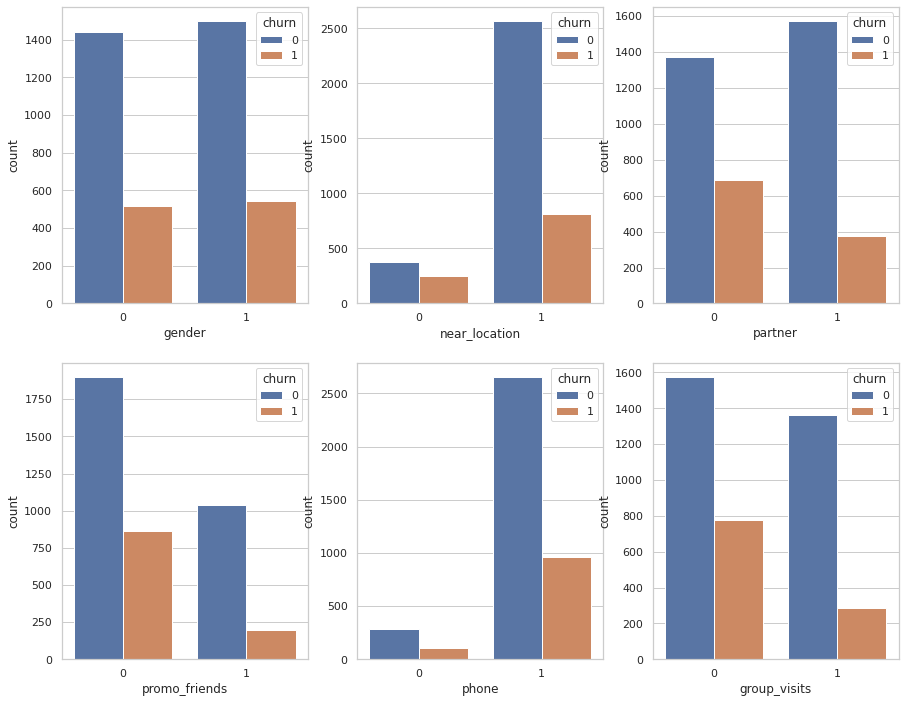

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
axes_list = [item for sublist in axes for item in sublist]
for column in row_bin_not_shurn:
    ax = axes_list.pop(0)
    sns.countplot(x = fit[column], hue = 'churn', data = fit, ax=ax)
plt.show()

Из данных гистограмм четко прослеживается зависимость оттока клиентов от расположения фитнес-центра, является ли клиент партнером или нет, пришел ли он по рекомендации и посещает ли он групповые занятия.
<br>Зависимости от пола и наличия телефона не выявлены

Построение гистограмм c нормальным распределением для всех столбцов

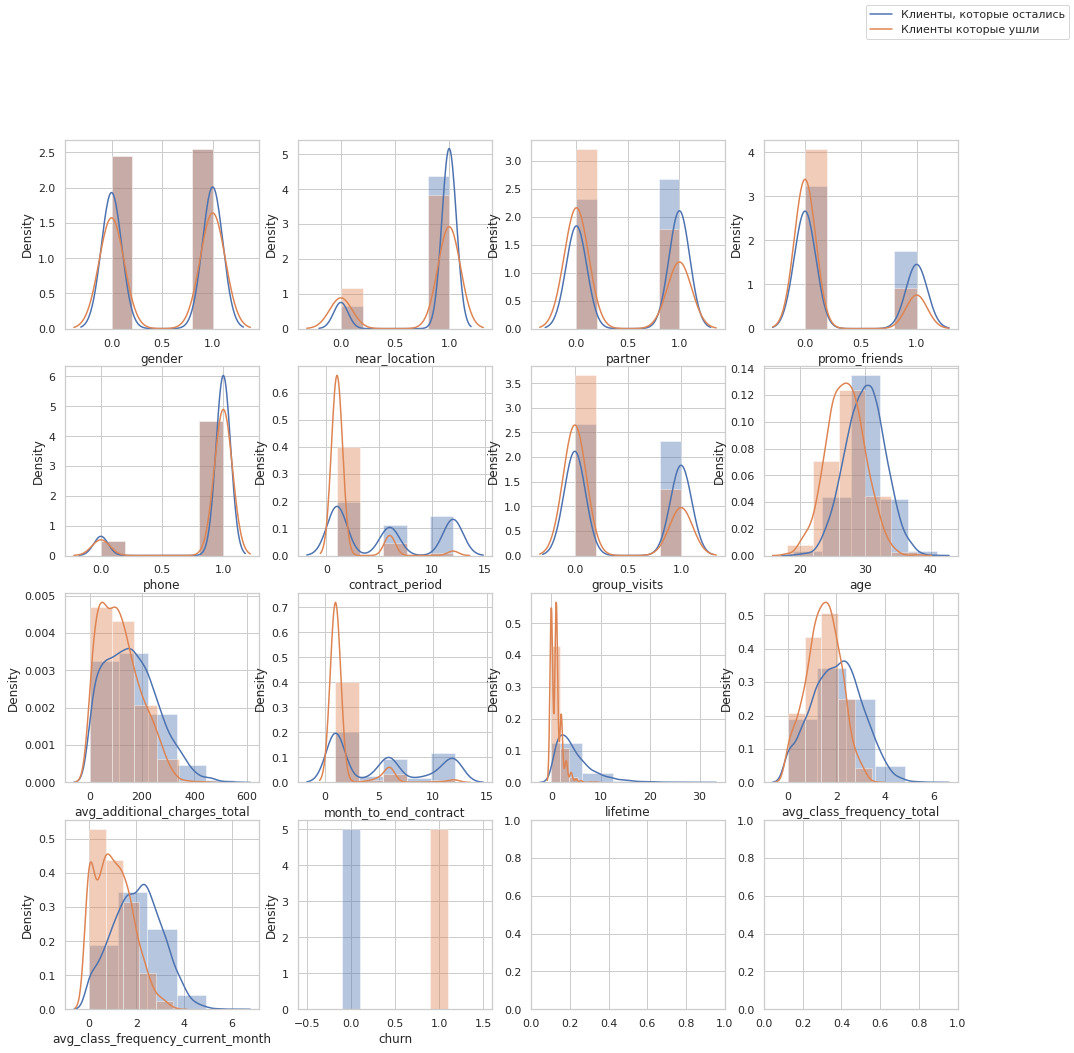

In [38]:
fig, ax = plt.subplots(4, 4, figsize=(16,16))
ax = ax.ravel()
for n, feature in enumerate(fit.columns):
    sns.distplot(fit[fit['churn'] == 0][feature], bins=5, ax=ax[n], kde = True)
    sns.distplot(fit[fit['churn'] == 1][feature], bins=5, ax=ax[n], kde = True)
fig.legend(labels=['Клиенты, которые остались','Клиенты которые ушли'])
plt.show()

Данные графики для булевых столбцов подтверждают информацию приведенную выше.
<br>Для остальных столбцов (выводы совпадают с выводами из пункта 2.3):
- чем больше длительность текущего абонемента (либо срок до окончания абонемента), тем ниже отток клиентов,
- распределение оттока по возрасту близко к нормальному,
- максимальный отток клиентов происходит в ситуации, когда клиент тратит мало деег на доп услуги центра,
- максимальный отток клиентов происходит в первые месяцы после обращения в фитнес-клуб,
- чем выше средняя частота посещений в неделю за предыдущий месяц (либо за весь срок абонемента), тем ниже отток клиентов.

### Построение матрицы корреляций

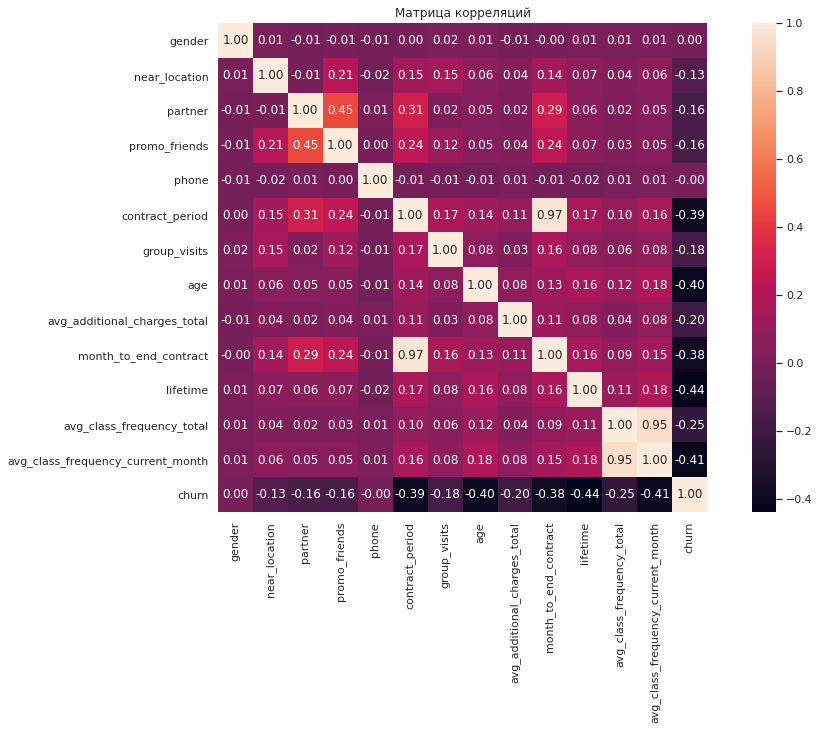

In [39]:
cm = fit.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots()

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True, fmt = '0.2f')
plt.title('Матрица корреляций')
plt.show()

Воспользуемся шкалой Чеддока.
<br>Весьма высокой (от 0,9 до 1), высокой (от 0,7 до 0,9) и заметной (от 0,5 до 0,7) силы связи целевого признака "churn" с признаками-факторами нет.
<br>Между целевым признаком `churn` и признаками-факторами `contract_period`, `age`, `month_to_end_contract`, `lifetime`, `avg_class_frequency_current_month` существует умеренная корреляционная связь (от 0,3 до 0,5)
<br>Между целевым признаком `churn` и признаками-факторами `near_Location`, `partner`, `promo_friends`, `group_visits`, `avg_additional_charges_total` и `avg_class_frequency_total` существует слабая корреляционная связь (от 0,1 до 0,3)
<br>Между целевым признаком `churn` и признаками-факторами `gender` и `phone` корреляционная связь отсутствует
<br>
<br>При этом между факторами `Month_to_end_contract` и `Contract_period`, а также между факторами `Avg_class_frequency_total` и `Avg_class_frequency_current_month` существует мультиколлинеарность (коэффициент попарной корреляции больше 0,7), то есть факторы очень сильно зависят друг от друга. При этом убирать один фактор из каждой пары нет целесообразно, так как логистическая регрессия по умолчанию применяет регуляризацию, которая сглаживает проблему мультиколлинерности. 

### Выводы по пункту 2

В данному пункте был проведен исследовательский анализ данных.
в ходе которого были сделаны следующие выводы:
- число признаков n = 14, а коэффициент k = 10 (примем значение из лекций), то получим минимальный объем выборки равный s = k * n = 10 * 14 = 140. Наша выборка состоит из 4000 значений, что намного превышает минимальное значение. Следовательно, объем датафрейма достаточен для осуществления прогнозирования,
- пропусков, дубликатов, заведомо нереальных значений не обнаружено,
- категориальные признаки приведены к числовым (0 и 1),
- существуют признаки которые не имеют связи с целевым признаком (это `пол клиента` и то, оставил ли он `свой телефон`),
- существуют признаки которые коррелируют между собой, это `Срок до окончания текущего действующего абонемента` и `Длительность текущего действующего абонемента`, а также `Средняя частота посещений в неделю за все время с начала действия абонемента` и `Средняя частота посещений в неделю за предыдущий месяц`,
<br>
<br>Можно приступать к построению модели прогнозировония

## Построение модели прогнозирования оттока клиентов

Модель бинарной классификации клиентов (ушел - 0, остался - 1), где целевой признак — факт оттока клиента в следующем месяце

### Разделение данные на обучающую и валидационную выборку

In [40]:
#При составлении модели прогнозирования уберем столбцы, которые не имеют свящи с целевым признаком ('gender', 'phone')
X = fit.drop(['churn', 'gender', 'phone'], axis=1) 
y = fit['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify = y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучение модели способом логистической регрессии

In [42]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [43]:
# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
print('Соотношение классов:\n', fit['churn'].value_counts())

Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64


### Обучение модели способом случайного леса

In [44]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

### Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке

In [45]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [46]:
# метрики для модели логистической регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)
# метрики для модели случайного леса
print_all_metrics(
    y_test, rf_predictions, rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98
Метрики для модели случайного леса:
	Accuracy: 0.93
	Precision: 0.90
	Recall: 0.83
	F1: 0.86
	ROC_AUC: 0.97


<br>Для модели логистической регрессии 93% ответов правильно прогнозируются, точность составляет 89% (то есть в 89 случаев из 100 модель срабатывает верно), полнота равна 83% (то есть в 83 случаях их 100 модель минимизирует противоположные риски)
<br>Сводная метрика составляет 86%. Метрика ROC_AUC (площадь под кривой ошибок) равна 98%
<br>
<br>Для модели случайного леса 93% ответов правильно прогнозируются, точность составляет 90% (то есть в 90 случаев из 100 модель срабатывает верно), полнота равна 86% (то есть в 86 случаях их 100 модель минимизирует противоположные риски)
<br>Сводная метрика составляет 86%. Метрика ROC_AUC (площадь под кривой ошибок) равна 97%

### Выводы по пункту 3

Для финтес-центра не так страшно не верно отнести клиента, который не планирует уходить, в кластер тех, кто планирует уйти, чем пропустить клиента, который вскоре уйдет, и ничего с эти не сделать. 
<br>Очевидно, что мы не можем находить всех уходящих в отток клиентов и только их. Но, определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдет с большей вероятностью, так как мы ограничены в ресурсах колл-центра
<br>Поэтому для нашего проекта наиболее важными метриками являются метрики precision (точность) и recall (полнота).

При сравнении метрик различных моделей можно сделать вывод, что они обе достаточно точны, но модель логистической регрессиии показала себя лучше

## Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов)

### Стандартизация данных

In [51]:
sc = StandardScaler()
X_sc = sc.fit_transform(fit.drop(columns=['churn']))

### Построение матрицы расстояний на стандартизованной матрице признаков

In [48]:
linked = linkage(X_sc, method = 'ward')
print(linked)

[[9.70000000e+01 3.22200000e+03 1.00990653e-01 2.00000000e+00]
 [2.61000000e+02 3.17900000e+03 1.22634574e-01 2.00000000e+00]
 [8.90000000e+02 1.75000000e+03 1.28123291e-01 2.00000000e+00]
 ...
 [7.98700000e+03 7.99500000e+03 8.38725499e+01 2.65600000e+03]
 [7.98800000e+03 7.99600000e+03 8.89563592e+01 3.03400000e+03]
 [7.99200000e+03 7.99700000e+03 1.04627601e+02 4.00000000e+03]]


### Построение дендрограммы

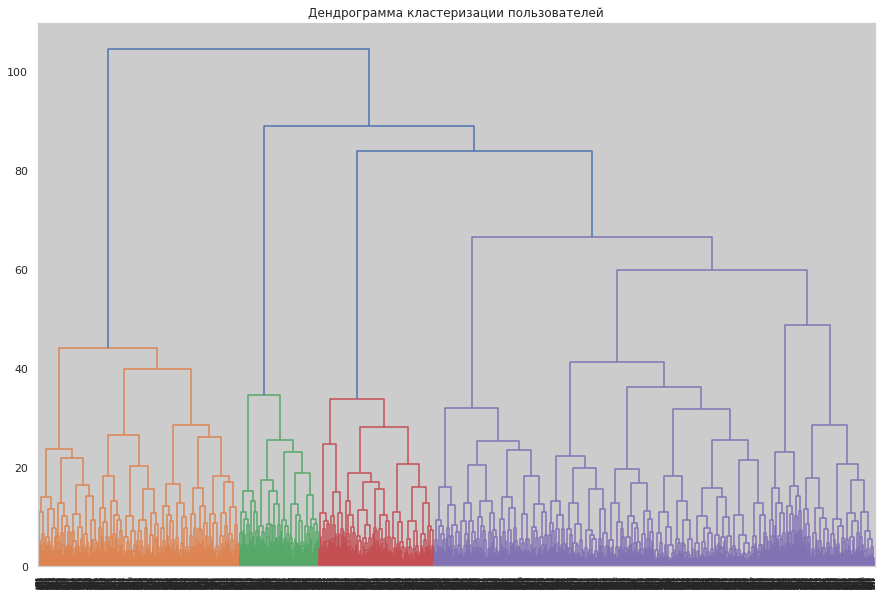

In [49]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation = 'top')
plt.title('Дендрограмма кластеризации пользователей')
plt.show()

Исходя из дендограммы можно предположить деление клиентов фитнес-центра на 6 кластеров

### Обучение модели кластеризации на основании алгоритма K-Means

Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов.
Поэтому примем число кластеров не 6, а 5.

In [52]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
fit['cluster_km'] = labels

### Построение распределения признаков для кластеров

In [53]:
fit.cluster_km.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster_km, dtype: int64

In [54]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация.
<br>Следовательно, наша кластеризация проведена плохо

### Расчет доли оттока для каждого кластера

In [56]:
fit.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.503,0.522,0.495,0.486,0.560
near_location,0.959,0.862,0.000,1.000,0.976
partner,0.783,0.470,0.463,0.350,0.357
promo_friends,0.574,0.306,0.079,0.240,0.230
phone,1.000,0.000,1.000,1.000,0.999
contract_period,10.889,4.787,2.352,1.948,2.669
group_visits,0.543,0.426,0.216,0.342,0.474
age,29.982,29.301,28.477,28.168,30.125
avg_additional_charges_total,160.761,143.958,135.458,131.622,161.658
month_to_end_contract,9.954,4.475,2.198,1.857,2.459


Нарисуем графики характеризующие кластеризацию

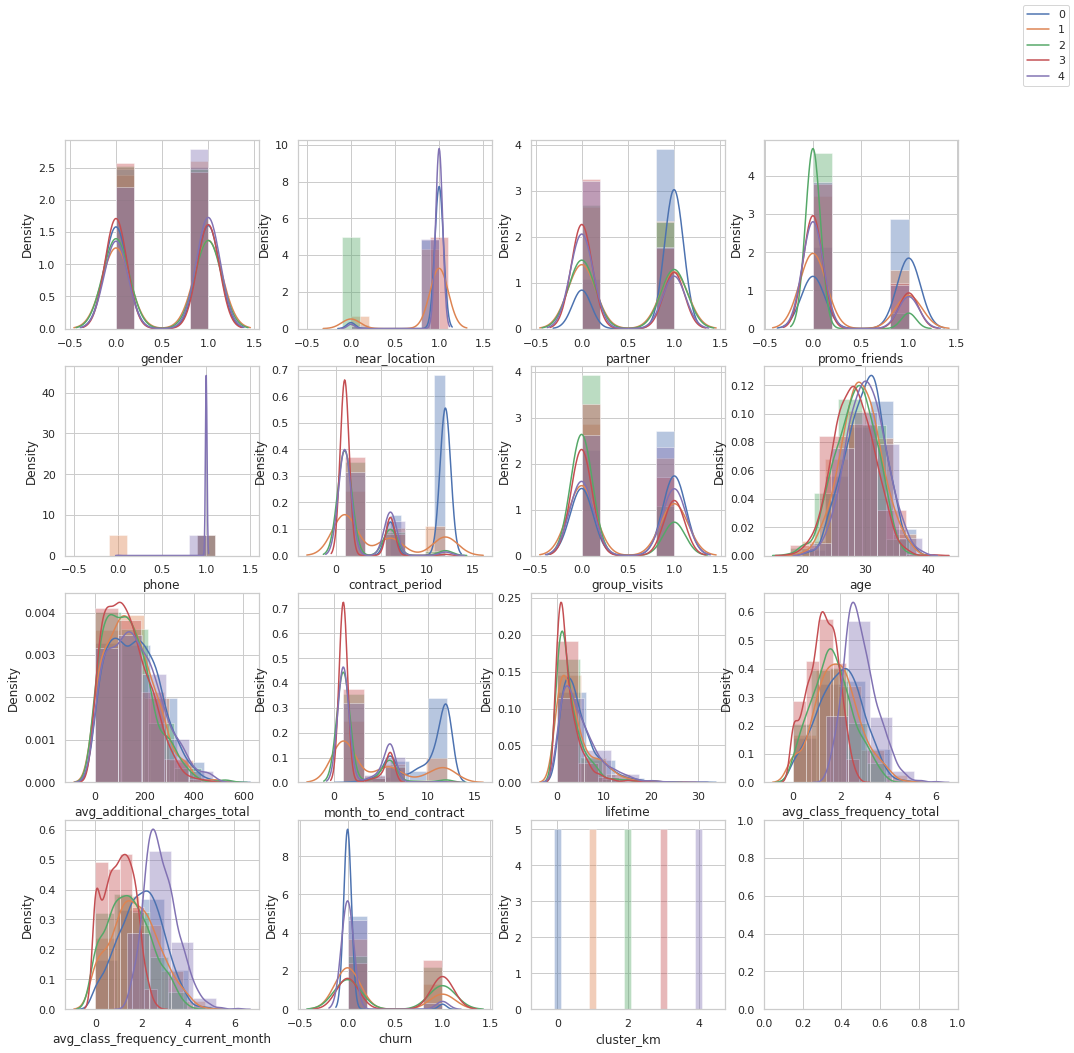

In [57]:
fig, ax = plt.subplots(4, 4, figsize=(16,16))
ax = ax.ravel()
for n, feature in enumerate(fit.columns):
    for i in (0, 1, 2, 3, 4):
        sns.distplot(fit[fit['cluster_km'] == i][feature], bins=5, ax=ax[n], kde = True)
fig.legend(labels=['0','1','2','3','4'])
plt.show()

### Выводы для пункта 4

Наиболее склонными к оттоку являются клиенты, которые попали в третий (51,4% от всех клиентов) и второй кластеры (44,4%).
<br>Наименее склонными к оттоку являются клиенты, которые попали в нулевой (2,8%) и четвертый кластеры (6,8%).
<br>Самым устойчивым кластером является `кластер 0`: в него вошли клиенты фитнес-клуба, которые живут или работают около него, являются партнерами клуба, в половине случаев они пришли по рекомендации друзей, оставили свой телефон, купили абонемент на 6 месяцев, в половине случаев они посещают групповые занятия, их средний возраст составляет 29 лет, траты на дополнительные услуги в среднем равны 160 ден. ед., до конца абонемента осталось более полугода, они провели в клубе более 4 месяцев, ходят в клуб около 2 раз в неделю
<br>
<br>Второй по устойчивости кластер - это `кластер 4`: в него вошли клиенты фитнес-клуба, которые живут или работают около него, при этом не являются партнерами клуба, в 23% случаев они пришли по рекомендации друзей, оставили свой телефон, купили абонемент на год, в половине случаев они посещают групповые занятия, их средний возраст составляет 30 лет, траты на дополнительные услуги в среднем равны 161 ден. ед., до конца абонемента осталось около 2 месяцев, они провели в клубе более 4 месяцев, ходят в клуб около 2-3 раз в неделю
<br>
<br>Третий по устойчивости к оттоку кластер - это `кластер 1`: клиенты, которые не оставили свой телефон
<br>
<br>Четвертый по устойчивости к оттоку кластер - это `кластер 2`: клиенты которые далеко живут и работают от клуба, пришли в клуб самостоятельно, а не по рекомендации, оставили свой телефон, не посещают групповые занятия, ходят в клуб около 1-2 аз в неделю
<br>
<br>Самыми плохо удерживаемыми клиентами являются клиенты из `кластера 3`: как ни странно, это люди, которые близко живут или работают, не являются партнерами, пришли в клуб не по рекомендации, оставили свой телефон, купили абонемент на 6 месяцев, редко посещают групповые занятия, самые молодые по возрасту около 28 лет, тратят меньше всего денег на допуслуги, ходят в клуб 1 рах в неделю, пришли в клуб недавно, около 2 месяцев назад

## Выводы и рекомендации по работе с клиентами

- Пропусков в таблице нет. Явных дубликатов тоже нет. Все уникальные значения соответствуют логике.
- При сравнении метрик различных моделей можно сделать вывод, что они обе достаточно точны, но модель логистической регрессиии показала себя лучше
- Было выделено 5 кластеров, кластеризация проведена плохо, так как метрика Silhouette_score близка к 0
- Наиболее склонными к оттоку являются клиенты, которые попали в третий (51,4% от всех клиентов) и второй кластеры (44,4%).
- Наименее склонными к оттоку являются клиенты, которые попади в нулевой (2,8%) и четвертый кластеры (6,8%).
- **Необходимо провести кластеризацию еще раз, возможно выделить меньшее количество кластеров** (в учебном проекте было предложено выделение именно 5 кластеров)

**Рекомендации по работе с клиентами:**
- Следует обратить особое внимание на клиентов из кластеров 0 и 4: для них следует ввести `скидки при посещении групповых занятий`, `бонусы за рекомендацию друзьям`, `скидки на допуслуги фитнеса`, стоит рассмотреть введение скидок или бонусов на счет при `покупке абонемента на год`, какие-то "плюшки" для клиентов `старше 30 лет` (бесплатный сеанс массажа или допзанятие из новой для него сферы фитнеса)
- Следует давать наружнюю рекламу вблизи фитнес-клуба (раздавать листовки, устраивать промо-акции или веселые конкурсы)
- Менее интересные клиенты - это люди моложе 30 лет, которые живут и работают далеко от фитнес-центра и посещают его 1 раз в неделю. Удержать их очень сложно. И не стоит вкладывать в это большие усилия и денежные средства.